# Lab 03: Deep Learning Library in PyTorch

In [1]:
import torch
import matplotlib.pyplot as plt

## Q1
For the following training data, build a linear regression model. Assume w and b are
initialized with 1 and learning parameter is set to 0.001.

x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

The Parameters are tensor([0.3512], requires_grad=True) and tensor([0.6213], requires_grad=True)
The parameters are w=tensor([0.6553], requires_grad=True), b=tensor([0.6384], requires_grad=True), and loss=74.41874694824219
The parameters are w=tensor([0.7698], requires_grad=True), b=tensor([0.6448], requires_grad=True), and loss=10.57785701751709
The parameters are w=tensor([0.8130], requires_grad=True), b=tensor([0.6473], requires_grad=True), and loss=1.5128331184387207
The parameters are w=tensor([0.8293], requires_grad=True), b=tensor([0.6482], requires_grad=True), and loss=0.22565343976020813
The parameters are w=tensor([0.8354], requires_grad=True), b=tensor([0.6485], requires_grad=True), and loss=0.04288267344236374
The parameters are w=tensor([0.8377], requires_grad=True), b=tensor([0.6486], requires_grad=True), and loss=0.01692986488342285
The parameters are w=tensor([0.8386], requires_grad=True), b=tensor([0.6487], requires_grad=True), and loss=0.01324465125799179
The paramete

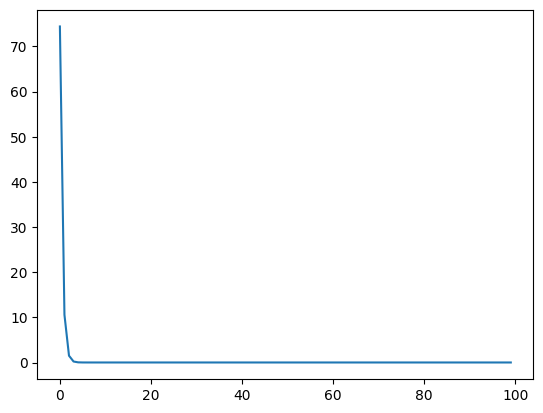

In [8]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0,
                   17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 
                   19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9,
                  15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 
                  16.8, 15.2, 17.0, 17.2, 18.6])

b = torch.rand([1], requires_grad=True)
w = torch.rand([1], requires_grad=True)
print("The Parameters are {} and {}".format(w, b))

learning_rate = torch.tensor(0.001)

loss_list = []

for epochs in range(100):
    
    loss = 0.0
    
    for j in range(len(x)):
        a = w*x[j]
        y_p = a+b
        loss += (y_p - y[j])**2
        
    loss = loss/(len(x))
    
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
        
    w.grad.zero_()
    b.grad.zero_()
    
    print("The parameters are w={}, b={}, and loss={}".format(w, b, loss.item()))

plt.plot(loss_list)
plt.show()

## Q2
Find the value of w.grad, b.grad using analytical solution for the given linear regression
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same
and verify the values of w.grad , b.grad and updated parameter values for two epochs.
Consider the difference between predicted and target values of y is defined as (yp-y).

The Parameters are tensor([1.], requires_grad=True) and tensor([1.], requires_grad=True)


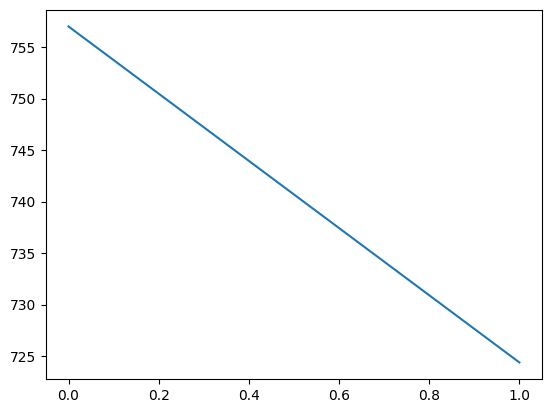

w for each epochs:  [1.1740000247955322, 1.344208002090454]
w grad for each epochs:  [-174.0, -170.20799255371094]
b for each epochs:  [1.0520000457763672, 1.1028521060943604]
b grad for each epochs:  [-52.0, -50.85199737548828]


In [41]:
x = torch.tensor([2, 4])
y = torch.tensor([20, 40])

b = torch.tensor([1.0], requires_grad=True)
w = torch.tensor([1.0], requires_grad=True)
print("The Parameters are {} and {}".format(w, b))

learning_rate = torch.tensor(0.001)

loss_list = []
w_list = []
b_list = []
w_grad_list = []
b_grad_list = []

for epochs in range(2):
    
    loss = 0.0
    
    for j in range(len(x)):
        a = w*x[j]
        y_p = a+b
        loss += (y_p - y[j])**2
        
    loss = loss/(len(x))
    
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate*w.grad
        b -= learning_rate*b.grad
    
    w_list.append(w.item())
    b_list.append(b.item())
    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())
    
    w.grad.zero_()
    b.grad.zero_()

plt.plot(loss_list)
plt.show()

print("w for each epochs: ", w_list)
print("w grad for each epochs: ", w_grad_list)
print("b for each epochs: ", b_list)
print("b grad for each epochs: ", b_grad_list)


## Q3
Revise the linear regression model by defining a user defined class titled RegressionModel
with two parameters w and b as its member variables. Define a constructor to initialize w
and b with value 1. Define four member functions namely forward(x) to implement wx+b,
update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp)
to implement MSE Loss given the predicted y value yp and the target label y. Define an
object of this class named model and invoke all the methods. Plot the graph of epoch vs
loss by varying epoch to 100 iterations.

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])

y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

The parameters are w=tensor([0.8423], requires_grad=True), b=tensor([0.9646], requires_grad=True), and loss=829.0848388671875
The parameters are w=tensor([1.0196], requires_grad=True), b=tensor([1.1420], requires_grad=True), and loss=786.5678100585938
The parameters are w=tensor([1.1924], requires_grad=True), b=tensor([1.3147], requires_grad=True), and loss=746.2401733398438
The parameters are w=tensor([1.3607], requires_grad=True), b=tensor([1.4830], requires_grad=True), and loss=707.9892578125
The parameters are w=tensor([1.5245], requires_grad=True), b=tensor([1.6469], requires_grad=True), and loss=671.70849609375
The parameters are w=tensor([1.6842], requires_grad=True), b=tensor([1.8065], requires_grad=True), and loss=637.2962036132812
The parameters are w=tensor([1.8397], requires_grad=True), b=tensor([1.9620], requires_grad=True), and loss=604.6566772460938
The parameters are w=tensor([1.9911], requires_grad=True), b=tensor([2.1134], requires_grad=True), and loss=573.69866943359

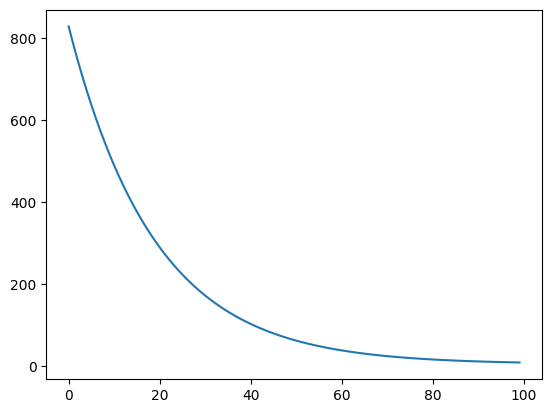

In [33]:
class RegressionModel:
    def __init__(self):
        self.w = torch.rand([1], requires_grad=True)
        self.b = torch.rand([1], requires_grad=True)
        self.learning_rate = torch.tensor(0.001)
    
    def forward(self, x):
        return self.w*x + self.b
    
    def update(self):
        self.w -= self.learning_rate * self.w.grad
        self.b -= self.learning_rate * self.w.grad
        
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
      
    
def criterion(yj, y_p):
    return (yj - y_p)**2
    
model = RegressionModel()

loss_list = []

for epochs in range(100):
    loss = 0.0
    
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += criterion(y[j], y_p)
        
    loss = loss/len(x)
    loss_list.append(loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        model.update()
    
    model.reset_grad()
    
    print("The parameters are w={}, b={}, and loss={}".format(model.w, model.b, loss.item()))

plt.plot(loss_list)
plt.show()

## Q4
Convert your program written in Qn 3 to extend nn.module in your model. Also override
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

Epoch [1/100], w = 11.4966, b = 1.7707, Loss = 9850.5205
Epoch [2/100], w = 12.9773, b = 1.8880, Loss = 679.9607
Epoch [3/100], w = 12.9142, b = 1.9028, Loss = 628.9954
Epoch [4/100], w = 13.2766, b = 1.9462, Loss = 589.9943
Epoch [5/100], w = 12.2533, b = 1.9014, Loss = 641.5056
Epoch [6/100], w = 12.1348, b = 1.9167, Loss = 615.8089
Epoch [7/100], w = 12.9120, b = 1.9953, Loss = 596.9429
Epoch [8/100], w = 12.7863, b = 2.0184, Loss = 659.9864
Epoch [9/100], w = 12.5190, b = 2.0292, Loss = 646.8384
Epoch [10/100], w = 12.9430, b = 2.0755, Loss = 573.2875
Epoch [11/100], w = 13.2153, b = 2.1069, Loss = 582.7848
Epoch [12/100], w = 13.2255, b = 2.1316, Loss = 651.7248
Epoch [13/100], w = 12.6129, b = 2.1106, Loss = 617.0386
Epoch [14/100], w = 13.0109, b = 2.1668, Loss = 571.4011
Epoch [15/100], w = 13.0819, b = 2.1945, Loss = 626.4835
Epoch [16/100], w = 13.2698, b = 2.2186, Loss = 606.4133
Epoch [17/100], w = 12.6233, b = 2.1868, Loss = 645.5967
Epoch [18/100], w = 13.3327, b = 2.2518

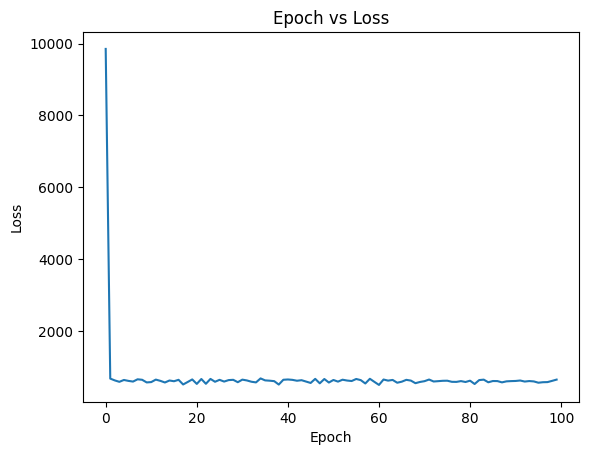

In [34]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.w = nn.Parameter(torch.tensor([1.0]))
        self.b = nn.Parameter(torch.tensor([1.0]))

    def forward(self, x):
        return self.w * x + self.b


class RegressionDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x = x_data
        self.y = y_data

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]


x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

dataset = RegressionDataset(x, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_list = []

for epoch in range(100):
    total_loss = 0.0

    for x_batch, y_batch in dataloader:
        optimizer.zero_grad()

        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    loss_list.append(avg_loss)

    print(f"Epoch [{epoch + 1}/100], w = {model.w.item():.4f}, b = {model.b.item():.4f}, Loss = {avg_loss:.4f}")

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

## Q5
Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data
provided in Qn. 1. Also plot the graph.

Epoch [100/1000], Loss: 0.0140
Epoch [200/1000], Loss: 0.0139
Epoch [300/1000], Loss: 0.0139
Epoch [400/1000], Loss: 0.0139
Epoch [500/1000], Loss: 0.0139
Epoch [600/1000], Loss: 0.0139
Epoch [700/1000], Loss: 0.0139
Epoch [800/1000], Loss: 0.0138
Epoch [900/1000], Loss: 0.0138
Epoch [1000/1000], Loss: 0.0138


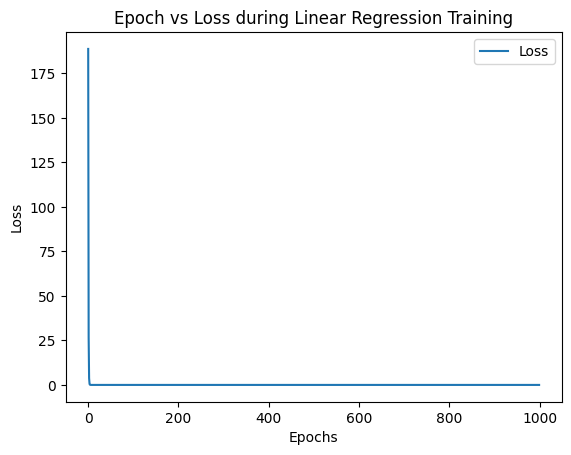

In [35]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4,
                  19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2]).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6,
                  16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6]).view(-1, 1)

model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = model(x)

    loss = criterion(y_pred, y)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epoch vs Loss during Linear Regression Training')
plt.legend()
plt.show()

## Q6
Implement multiple linear regression for the data provided below. Verify your answer for the data point X1=3, X2=2.

In [38]:
import torch.nn as nn
import torch.optim as optim
import numpy as np

X = np.array([[3, 8], [4, 5], [5, 7], [6, 3], [2, 1]], dtype=np.float32)
Y = np.array([-3.7, 3.5, 2.5, 11.5, 5.7], dtype=np.float32)

X_train = torch.tensor(X)
Y_train = torch.tensor(Y).view(-1, 1)


class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    model.train()
    Y_pred = model(X_train)

    loss = criterion(Y_pred, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
test_input = torch.tensor([[3, 2]], dtype=torch.float32)
predicted_output = model(test_input).item()

print(f"Predicted Y for X1=3, X2=2: {predicted_output:.4f}")


Epoch [100/1000], Loss: 0.2844
Epoch [200/1000], Loss: 0.2003
Epoch [300/1000], Loss: 0.1412
Epoch [400/1000], Loss: 0.0997
Epoch [500/1000], Loss: 0.0704
Epoch [600/1000], Loss: 0.0499
Epoch [700/1000], Loss: 0.0355
Epoch [800/1000], Loss: 0.0253
Epoch [900/1000], Loss: 0.0182
Epoch [1000/1000], Loss: 0.0131
Predicted Y for X1=3, X2=2: 6.1573


## Q7
Implement logistic regression

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]

y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

In [39]:
import torch.nn as nn
import torch.optim as optim
import numpy as np

x = np.array([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=np.float32).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=np.float32).reshape(-1, 1)

X_train = torch.tensor(x)
Y_train = torch.tensor(y)


class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


model = LogisticRegressionModel()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

epochs = 1000
for epoch in range(epochs):
    model.train()
    Y_pred = model(X_train)

    loss = criterion(Y_pred, Y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    Y_pred = model(X_train)
    Y_pred = Y_pred.round()

print("\nPredicted labels: ", Y_pred.flatten().numpy())
print("True labels: ", Y_train.flatten().numpy())


Epoch [100/1000], Loss: 0.3131
Epoch [200/1000], Loss: 0.2873
Epoch [300/1000], Loss: 0.2653
Epoch [400/1000], Loss: 0.2465
Epoch [500/1000], Loss: 0.2303
Epoch [600/1000], Loss: 0.2161
Epoch [700/1000], Loss: 0.2037
Epoch [800/1000], Loss: 0.1927
Epoch [900/1000], Loss: 0.1830
Epoch [1000/1000], Loss: 0.1742

Predicted labels:  [0. 0. 0. 0. 0. 1. 1. 1. 1.]
True labels:  [0. 0. 0. 0. 0. 1. 1. 1. 1.]
